In [22]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [4]:
scores = pd.read_csv(r"C:\Users\yatha\Downloads\archive (6)\data\scores.csv")
scores = pd.DataFrame(scores)
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [5]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

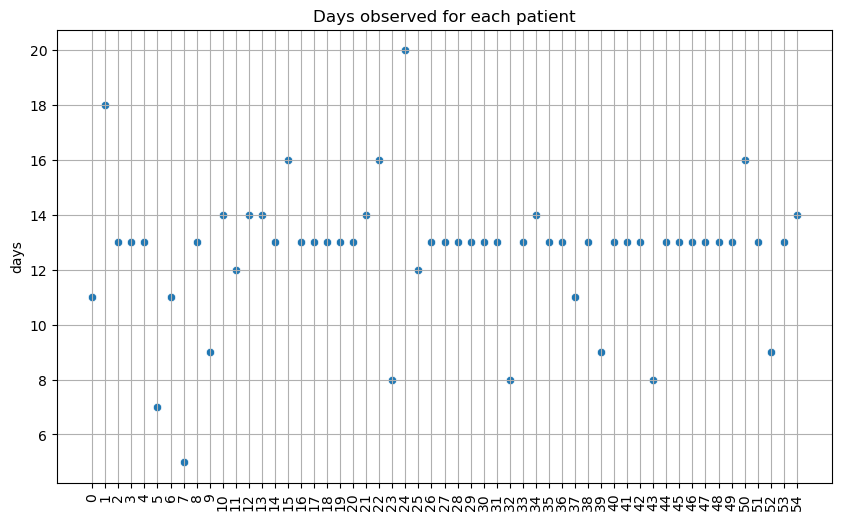

In [7]:
plt.figure(figsize= (10, 6), dpi = 100)

plt.title('Days observed for each patient')
sns.scatterplot(data = scores, x=range(55), y = 'days')

plt.xticks(range(55), rotation = 90)
plt.grid()
plt.show()

plt.close()

### Output: Most of the patients were observed from 8 days up to 16. Most popular is 13 days. 

In [8]:
for i in range(1, len(scores['number']) + 1):
    scores.loc[i - 1, 'id'] = int(i)
scores.loc[scores['id'] < 24, 'group'] = 0
scores.loc[scores['id'] > 23, 'group'] = 1
#2 grps acc to age
scores.tail(3)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,id,group
52,control_30,9,2,35-39,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,53.0,1.0
53,control_31,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,54.0,1.0
54,control_32,14,2,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,55.0,1.0


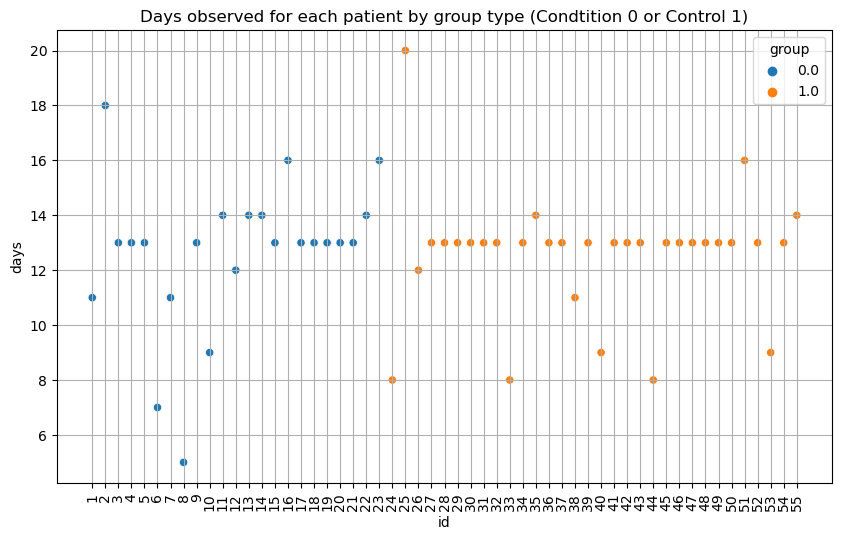

In [9]:
plt.figure(figsize= (10, 6), dpi = 100)

plt.title('Days observed for each patient by group type (Condtition 0 or Control 1)')
sns.scatterplot(data = scores, x='id', y = 'days', hue = 'group')

plt.xticks(scores['id'], rotation = 90)
plt.grid()
plt.show()

plt.close()

In [10]:
by_gender = scores.groupby('gender')['id'].count()

by_gender

gender
1    30
2    25
Name: id, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='id'>

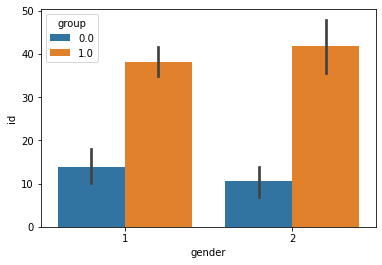

In [11]:
sns.barplot(x = 'gender', y ='id', data = scores, hue = 'group')

In [12]:
print(len(scores[(scores['group'] == 1) & (scores['gender'] == 2)]) / len(scores[scores['group'] == 1]) )

print(len(scores[(scores['group'] == 1) & (scores['gender'] == 1)]) / len(scores[scores['group'] == 1]) )

print(len(scores[(scores['group'] == 0) & (scores['gender'] == 2)]) / len(scores[scores['group'] == 0]) )

print(len(scores[(scores['group'] == 0) & (scores['gender'] == 1)]) / len(scores[scores['group'] == 0]))

0.375
0.625
0.5652173913043478
0.43478260869565216


In [13]:
#condn-male
#control-female

In [14]:
def get_min_age(value):
    return int(value.split('-')[0])

def get_max_age(value):
    return int(value.split('-')[1])



scores['min_age'] = scores['age'].apply(lambda value: get_min_age(value))

scores['max_age'] = scores['age'].apply(lambda value: get_max_age(value))

scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,0.0,35,39
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,2.0,0.0,40,44
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,3.0,0.0,45,49
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0,0.0,25,29
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,5.0,0.0,50,54


In [15]:
print(f"Patients age start from {scores['min_age'].min()} up to {scores['max_age'].max()}")

Patients age start from 20 up to 69


In [16]:
#so dep lies mostly in this range

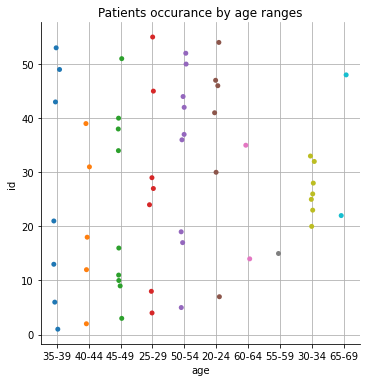

In [23]:
#its drawing time
sns.catplot('age', 'id', data = scores)

plt.grid()

plt.title('Patients occurance by age ranges')

plt.show()
plt.close()

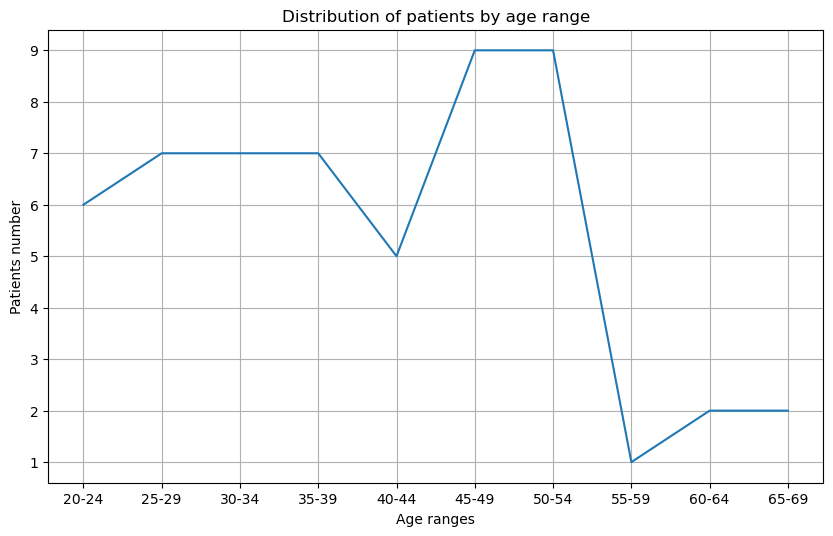

In [18]:
by_age = scores.groupby('age')['id'].count()
plt.figure(figsize=(10, 6), dpi = 100)


plt.title('Distribution of patients by age range')

plt.plot(by_age.index, by_age.values)

plt.ylabel('Patients number')
plt.xlabel('Age ranges')

plt.grid()

plt.show()

plt.close()

In [19]:
#40-54

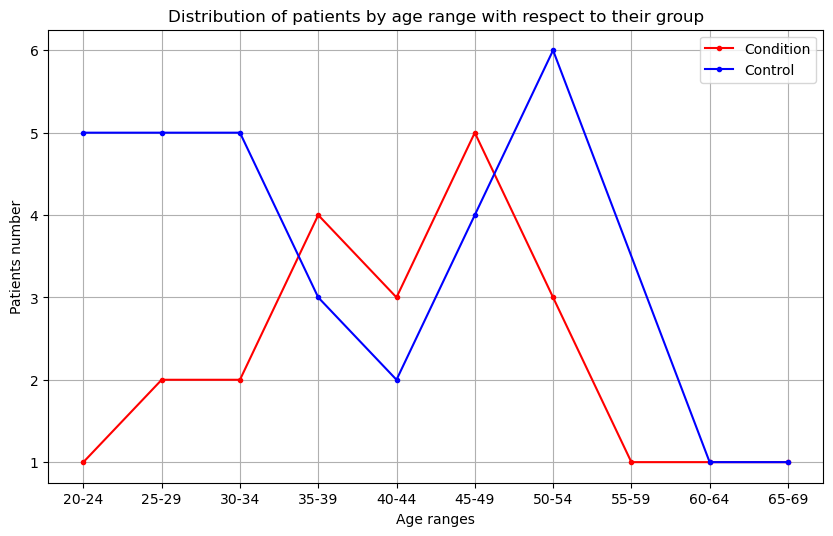

In [25]:
control = scores[scores['group'] == 1]
condition = scores[scores['group'] == 0]
cond_by_age = condition.groupby('age')['id'].count()
cont_by_age = control.groupby('age')['id'].count() 






plt.figure(figsize=(10, 6), dpi = 100)

plt.title('Distribution of patients by age range with respect to their group')

plt.plot(cond_by_age.index, cond_by_age.values, 'r.-')
plt.plot(cont_by_age.index, cont_by_age.values, 'b.-')


plt.ylabel('Patients number')
plt.xlabel('Age ranges')

plt.grid()
plt.legend(['Condition', 'Control'])
plt.show()
plt.close()

#### Condition and Control groups are not obeyed by same distribution.let's check how different gender seperated by age ranges

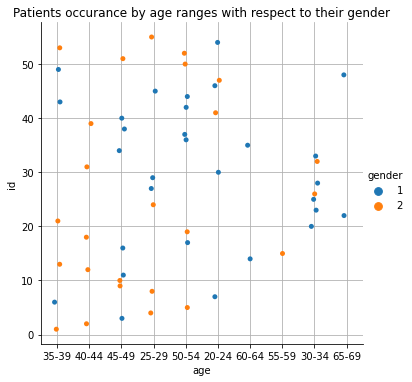

In [26]:
sns.catplot('age', 'id',hue = 'gender', data = scores)

plt.grid()

plt.title('Patients occurance by age ranges with respect to their gender')

plt.show()
plt.close()

In [27]:
def proportions_of_age_ranges(age):
    male = len(scores[(scores['age'] == age) & (scores['gender'] == 2)])
    
    female = len(scores[(scores['age'] == age) & (scores['gender'] == 1)])
    
    overall = male + female
    
    return f'proportion of male: {round(male / overall, 3)} and female: {round(female / overall, 3)} in age group {age}, overall there {overall} patients'

proportions_of_age_ranges('35-39')

'proportion of male: 0.571 and female: 0.429 in age group 35-39, overall there 7 patients'

In [28]:
for age_range in cond_by_age.index:
    print(proportions_of_age_ranges(age_range))

proportion of male: 0.333 and female: 0.667 in age group 20-24, overall there 6 patients
proportion of male: 0.571 and female: 0.429 in age group 25-29, overall there 7 patients
proportion of male: 0.286 and female: 0.714 in age group 30-34, overall there 7 patients
proportion of male: 0.571 and female: 0.429 in age group 35-39, overall there 7 patients
proportion of male: 1.0 and female: 0.0 in age group 40-44, overall there 5 patients
proportion of male: 0.333 and female: 0.667 in age group 45-49, overall there 9 patients
proportion of male: 0.444 and female: 0.556 in age group 50-54, overall there 9 patients
proportion of male: 1.0 and female: 0.0 in age group 55-59, overall there 1 patients
proportion of male: 0.0 and female: 1.0 in age group 60-64, overall there 2 patients
proportion of male: 0.0 and female: 1.0 in age group 65-69, overall there 2 patients


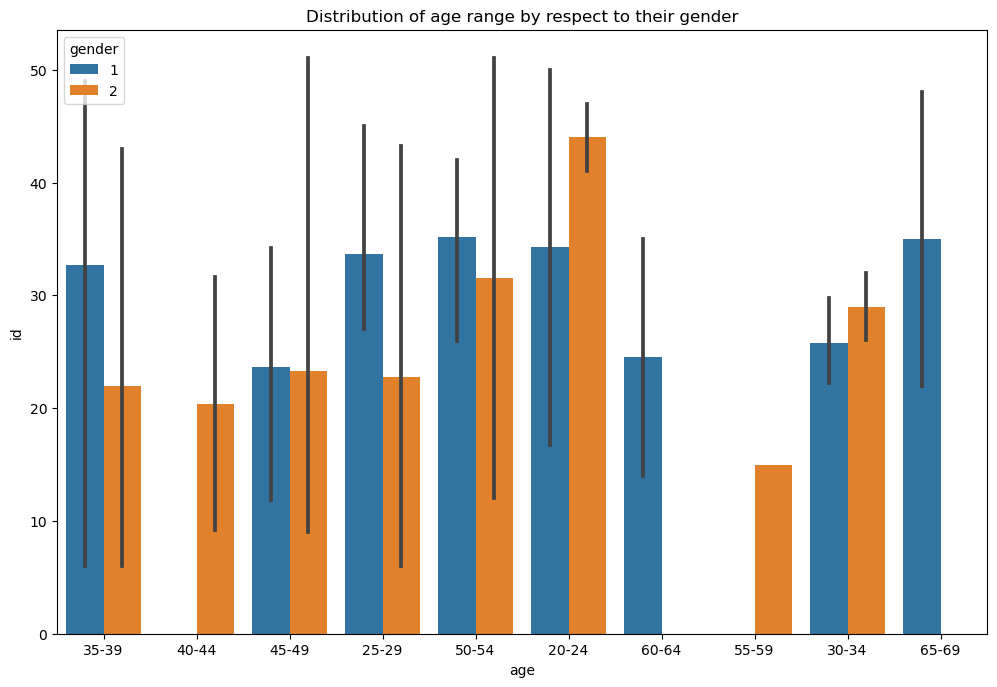

In [29]:
plt.figure(figsize=(12, 8), dpi = 100)

plt.title('Distribution of age range by respect to their gender')

sns.barplot(x = 'age', y = 'id', hue = 'gender', data = scores)

plt.show()

plt.close()

#### as there only 55 patients we can't deploy this hypothesises to all people. But, at the early age patients number is high, also from 20-25 mosly suffer men and then till 40 women